In [3]:
import os 
from datetime import datetime
from datetime import timedelta

# Fast review

1. What is a list?
2. What is a dictionary? 
3. What is a Pytyon library? 
4. What are two conventions for importing data from files in Python?

# Learning objectives

0. Review .csv importation, the working directory, and two common errors: Name and File
1. Begin to work with data frames in Python (tabular structures, like a spreadsheet!) 
2. Basic methods: `.head()`, `.rename()`, `.describe()`, and `.value_counts()`
3. Basic attributes: `.columns` and `.shape`
4. Subsetting: `.iloc()`, `.loc()`, and conditional 
5. Adding and removing columns

# Pandas

Pandas is designed to make it easier to work with [structured data](https://learn.g2.com/structured-vs-unstructured-data). Most of the analyses you might perform will likely involve using tabular data, e.g., from .csv files or relational databases (e.g., SQL). The DataFrame object in pandas is "a two-dimensional tabular, column-oriented data structure with both row and column labels."

**i.e., a spreadsheet!**

The pandas name itself is derived from panel data, an econometrics term for multidimensional structured data sets, and Python data analysis itself. [Check out the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) to learn more! 

### Import .csv file

Import the correspondence dataset:

In [4]:
# Uh-oh! # What is a NameError? Review "1-8_errors-help.ipynb" for a hint.
letters = pd.read_csv("correspondence-data-1585.csv")

NameError: name 'pd' is not defined

In [5]:
import pandas as pd

Alright! Now we are good to go, right?

In [6]:
# What is a FileError? Review "1-8_errors-help.ipynb" for a hint.
letters = pd.read_csv("correspondence-data-1585.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'correspondence-data-1585.csv'

# Set the working directory

Remember to....

In [10]:
# First, view the file path to your current working directory:
# %pwd
os.getcwd()

'/Users/tomvannuenen/Documents/GitHub/DIGHUM101-2022/Data'

In [11]:
# Then change the working directory path to the Data folder
# Go "up" two levels in your file structure and into the Data folder:
os.chdir("../../Data/")
os.getcwd()

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/'

In [12]:
# List the files in the working directory
# You should see "correspondence-data-1585.csv"
%ls

Geo/                          feminism.json
childrens_lit.csv             feminism.xml
compound_figure.pdf           frankenstein.txt
correspondence-data-1585.csv  gapminder-FiveYearData.csv
dracula.txt                   human-rights/
example.json                  iris.csv
example.xml                   music_reviews.csv


In [13]:
# Now we can load the file! :) 
letters = pd.read_csv("correspondence-data-1585.csv")

# `.head()`, `.describe()`, and `.value_counts()`

The `.head()` method will show the first five rows by default. Put an integer in the parentheses to specify a different number of rows. 

`.describe()` provides basic summary statistics. 

`.value_counts()` counts frequencies.

In [14]:
# View the first 3 rows
letters.head(3)

,writer,source,destination,date
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-03
1,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-09
2,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-11


In [15]:
type(letters)

pandas.core.frame.DataFrame

In [16]:
# Produce some quick summary statistics
letters.describe()

,writer,source,destination,date
count,114,114,114,114
unique,12,9,5,97
top,"Meulen, Andries van der",Antwerp,Delft,1585-05-28
freq,63,76,95,4


# `.value_counts()`

Now, we can investigate how many of each category?

In [17]:
# How many letters by each writer?
letters["writer"].value_counts()

Meulen, Andries van der           63
Della Faille, Jacques             31
Della Faille, Marten               6
Staten van Brabant                 4
Wale, Jan de                       2
Noirot, Jacques                    2
Della Faille, Joris                1
Eeckeren, Robert van               1
Anraet, Thomas                     1
Burgemeesters of Antwerp           1
Calvart, Jacques                   1
Janssen van der Meulen, Peeter     1
Name: writer, dtype: int64

In [18]:
# Which city was the most frequent source?
letters["source"].value_counts()

Antwerp      76
Haarlem      30
Venice        2
Dordrecht     1
Lisse         1
Het Vlie      1
Hamburg       1
Emden         1
Amsterdam     1
Name: source, dtype: int64

In [19]:
# Which city was the most frequent destination?
letters["destination"].value_counts()

Delft         95
Haarlem        8
Bremen         6
The Hague      3
Middelburg     2
Name: destination, dtype: int64

# Column names

You can call [attributes](https://medium.com/@shawnnkoski/pandas-attributes-867a169e6d9b) of a Pandas variable by using "dot notation" - but without the parentheses to unpack more information.

In [20]:
# Error! No such method exists
letters.columns()

TypeError: 'Index' object is not callable

In [21]:
# List the column names using the .columns *attribute*
letters.columns

Index(['writer', 'source', 'destination', 'date'], dtype='object')

# Select Columns

Select a single column by typing its name as a string in square brackets. View just the first five rows:

In [22]:
letters["writer"].head()

0    Meulen, Andries van der
1    Meulen, Andries van der
2    Meulen, Andries van der
3    Meulen, Andries van der
4    Meulen, Andries van der
Name: writer, dtype: object

In [23]:
letters.dtypes

writer         object
source         object
destination    object
date           object
dtype: object

# Double lists

You can also call multiple columns by passing their names in as strings to a [double list](https://stackoverflow.com/questions/33417991/pandas-why-are-double-brackets-needed-to-select-column-after-boolean-indexing)! View just the first five rows:

In [24]:
# That's a lot of square brackets!
letters[["writer", "date"]]

,writer,date
0,"Meulen, Andries van der",1585-01-03
1,"Meulen, Andries van der",1585-01-09
2,"Meulen, Andries van der",1585-01-11
3,"Meulen, Andries van der",1585-01-12
4,"Meulen, Andries van der",1585-01-12
...,...,...
109,"Della Faille, Jacques",1585-10-30
110,"Della Faille, Jacques",1585-11-30
111,"Noirot, Jacques",1585-12-16
112,"Noirot, Jacques",1585-12-20


# `.rename()`

Nice! Now that we know how to access the column names, we can edit the columns names with the .`rename()` method.

Pass in a dictionary argument to the columns parameter like this: `columns = {"old_name":"new_name"}`

In [25]:
letters.rename(columns = {"writer" : "Writer", 
                          "source" : "Origin",
                          "destination" : "Dest",
                          "date" : "Date"}, 
               inplace = True) # what does inplace = True mean? How do you find out?

# View the updated column names
print(letters.columns)

# or

letters.head()

Index(['Writer', 'Origin', 'Dest', 'Date'], dtype='object')


,Writer,Origin,Dest,Date
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-03
1,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-09
2,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-11
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-12
4,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-12


# Slice Rows

You can slice rows like you would a string or a list. If we just want three rows: 

In [26]:
letters[6:9]

,Writer,Origin,Dest,Date
6,"Meulen, Andries van der",Antwerp,Delft,1585-01-22
7,"Meulen, Andries van der",Antwerp,Delft,1585-01-23
8,"Della Faille, Marten",Antwerp,Haarlem,1585-01-24


# `.iloc()`

... or use `.iloc()` to return non-consecutive rows. Pass in **integers** as a double list. 

For example, to get the 4th, 12th, and 29th rows: 

In [27]:
letters.iloc[[3, 11, 28]]

,Writer,Origin,Dest,Date
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-12
11,"Meulen, Andries van der",Antwerp,Delft,1585-02-05
28,"Meulen, Andries van der",Antwerp,Delft,1585-03-11


... and pass in a second interior list to specify columns! Select just the "Writer" (0th index) and "Date" (3rd index) columns:

In [28]:
letters.columns

Index(['Writer', 'Origin', 'Dest', 'Date'], dtype='object')

In [29]:
letters.iloc[[3, 11, 28], [0,3]]

,Writer,Date
3,"Meulen, Andries van der",1585-01-12
11,"Meulen, Andries van der",1585-02-05
28,"Meulen, Andries van der",1585-03-11


# `.loc()` 

While `.iloc()` requires integers, regular `.loc()` allows you to pass in column names:

In [30]:
letters.loc[[3, 11, 28], ["Writer", "Date"]]

,Writer,Date
3,"Meulen, Andries van der",1585-01-12
11,"Meulen, Andries van der",1585-02-05
28,"Meulen, Andries van der",1585-03-11


# Conditional Subsetting

What is we want a subset based on a condition? For example, what if we just wanted a subset for data only when Destination is equal to Haarlem? 

... _and_ Writer is equal to Meulen, Andries van der?

In [31]:
letters["Dest"] == "Haarlem"

0      False
1       True
2       True
3      False
4       True
       ...  
109    False
110    False
111    False
112    False
113    False
Name: Dest, Length: 114, dtype: bool

In [32]:
# Data frame just of Haarlem destinations...
h = letters.loc[letters["Dest"] != "Haarlem"]
h

,Writer,Origin,Dest,Date
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-03
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-12
5,"Meulen, Andries van der",Antwerp,Delft,1585-01-17
6,"Meulen, Andries van der",Antwerp,Delft,1585-01-22
7,"Meulen, Andries van der",Antwerp,Delft,1585-01-23
...,...,...,...,...
109,"Della Faille, Jacques",Hamburg,Bremen,1585-10-30
110,"Della Faille, Jacques",Emden,Bremen,1585-11-30
111,"Noirot, Jacques",Haarlem,Bremen,1585-12-16
112,"Noirot, Jacques",Amsterdam,Bremen,1585-12-20


In [33]:
# Data frame just of Andries van der Meulen
am = letters.loc[letters["Writer"] == "Meulen, Andries van der"]
am.head()

# What does the .shape attribute do?
# 63 rows and 4 columns
am.shape

(63, 4)

In [34]:
(4 > 3) and (4 < 3)

False

In [35]:
# Data frame that includes both Haarlem as the destination AND Andries van der Meulen 
both = letters.loc[(letters["Dest"] == "Haarlem") |
                   (letters["Writer"] == "Meulen, Andries van der")]
both.shape

(68, 4)

Learn more by [reading the documentation here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) - what is the difference between `&` and `|` ?

# Sort Values
Sorting values can be valuable when we need to, well, sort the values of a (part of a) DataFrame! For instance, we can get only the letters with a destination of Delft, then sort the values in ascending order:

In [36]:
letters[letters["Dest"] == "Delft"].sort_values("Date", ascending=True)

,Writer,Origin,Dest,Date
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-03
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-12
5,"Meulen, Andries van der",Antwerp,Delft,1585-01-17
6,"Meulen, Andries van der",Antwerp,Delft,1585-01-22
7,"Meulen, Andries van der",Antwerp,Delft,1585-01-23
...,...,...,...,...
103,"Della Faille, Jacques",Haarlem,Delft,1585-09-08
104,"Della Faille, Jacques",Haarlem,Delft,1585-09-10
105,"Della Faille, Jacques",Haarlem,Delft,1585-09-14
106,"Della Faille, Marten",Antwerp,Delft,1585-09-16


# `Groupby()`

The `groupby()` method allows you to split your data into separate groups to perform computations such as `min()`, `mean()`, `sum()`, and so on. For instance, we can group by destination, then get the `describe()` valuse of each column. Try to see if you understand what this does.

In [37]:
letters.groupby("Dest").describe()

Writer                                      Origin                  \
            count unique                      top freq  count unique      top   
Dest                                                                            
Bremen          6      2    Della Faille, Jacques    4      6      5  Haarlem   
Delft          95      8  Meulen, Andries van der   59     95      3  Antwerp   
Haarlem         8      4  Meulen, Andries van der    3      8      3  Antwerp   
Middelburg      2      2  Meulen, Andries van der    1      2      2  Antwerp   
The Hague       3      3    Della Faille, Jacques    1      3      2  Antwerp   

                 Date                          
           freq count unique         top freq  
Dest                                           
Bremen        2     6      6  1585-10-21    1  
Delft        68    95     82  1585-05-28    4  
Haarlem       5     8      8  1585-01-09    1  
Middelburg    1     2      2  1585-05-04    1  
The Hague     2     3      3  1585-02-20    1

# Create a Column

You can add a new column by renaming it in place - just like with a list or dictionary:

In [38]:
letters["Estimated_Arrival"] = "Arrival date"

# All entries for "Estimated_Arrival" say "Arrival date"
letters.head()

,Writer,Origin,Dest,Date,Estimated_Arrival
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-03,Arrival date
1,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-09,Arrival date
2,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-11,Arrival date
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-12,Arrival date
4,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-12,Arrival date


# Advanced: working with datetimes
We can populate this column with the results of some expression/calculation. Perhaps we estimated it would have taken 10 days for a letter to reach its destination.

> NOTE: Working with datetimes in Python can be particularly frustrating! You will learn more about custom functions, for loops, list comprehensions, and lambda functions starting in week 3. The reason we are glossing over them now is so that you focus on what is possible for planning your individual projects instead of getting lost and frustrated in the nuances of the Python code.

In [39]:
letters['Date']

0      1585-01-03
1      1585-01-09
2      1585-01-11
3      1585-01-12
4      1585-01-12
          ...    
109    1585-10-30
110    1585-11-30
111    1585-12-16
112    1585-12-20
113    1585-12-27
Name: Date, Length: 114, dtype: object

Datetimes are a Pandas object that allow us to work with - you guessed it - dates. Let's try to convert this column to a datetime using Pandas' `to_datetime()` method.

In [40]:
pd.to_datetime(letters['Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1585-01-03 00:00:00

Well, that doesn't work. Here's why:

In [ ]:
pd.Timestamp.min

Turns out the timespan that can be represented using a 64-bit integer is limited to approximately 584 years. So we have to find a workaround. We apply a `lambda` (anonymous) function to the Date column, turning it into a `Period` object (read more [here](https://pandas.pydata.org/docs/reference/api/pandas.Period.html) if you are so inclined). 

Again: don't worry about the details of the following code cells. This is just to show you that sometimes, you have to find workarounds!

In [41]:
letters['Date'] = letters['Date'].apply(lambda x: pd.Period(x, freq='D'))

In [42]:
letters['Date']

0      1585-01-03
1      1585-01-09
2      1585-01-11
3      1585-01-12
4      1585-01-12
          ...    
109    1585-10-30
110    1585-11-30
111    1585-12-16
112    1585-12-20
113    1585-12-27
Name: Date, Length: 114, dtype: period[D]

Note that the `dtype` for this column has changed to `Period`. This means we can now perform datetime-like operations on it. Let's write a function that takes a datetime in, adds 10 days to it using the [`timedelta`](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html) method, and returns the datetime.

In [43]:
def addDays(dt):
    fulldate = datetime(dt.year, dt.month, dt.day)
    fulldate = fulldate + timedelta(days=10)
    return fulldate.date()

We then again `apply` a function to this column, this time the function we just created, and throw the output into a new column called "Estimated_arrival".

In [44]:
letters['Estimated_Arrival'] = letters['Date'].apply(addDays)


In [45]:
letters

,Writer,Origin,Dest,Date,Estimated_Arrival
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-03,1585-01-13
1,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-09,1585-01-19
2,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-11,1585-01-21
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-12,1585-01-22
4,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-12,1585-01-22
...,...,...,...,...,...
109,"Della Faille, Jacques",Hamburg,Bremen,1585-10-30,1585-11-09
110,"Della Faille, Jacques",Emden,Bremen,1585-11-30,1585-12-10
111,"Noirot, Jacques",Haarlem,Bremen,1585-12-16,1585-12-26
112,"Noirot, Jacques",Amsterdam,Bremen,1585-12-20,1585-12-30


There we go!

# My first visualization

We'll get into this in the weeks to come, but here's a sneak peak on how to make a quick visualization using the seaborn library. We're plotting the letters' destinations on the X-axis and change hues for the letters' origin. Turns out a lof of them come from Antwerp!

<AxesSubplot:xlabel='Dest', ylabel='Count'>

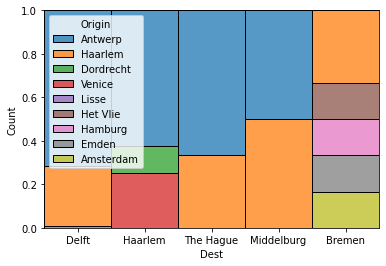

In [46]:
import seaborn as sns

sns.histplot(              
    data=letters,         
    x="Dest",
    hue="Origin", 
    multiple="fill"
)

# try changing the "multiple" parameter to any of “layer”, “dodge”, “stack”, “fill”

# Delete Column

Finally, we can use our `del` statement to delete a column just like we did with lists: 

In [47]:
# "Date" is removed!
del letters["Date"]
letters.head()

,Writer,Origin,Dest,Estimated_Arrival
0,"Meulen, Andries van der",Antwerp,Delft,1585-01-13
1,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-19
2,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-21
3,"Meulen, Andries van der",Antwerp,Delft,1585-01-22
4,"Meulen, Andries van der",Antwerp,Haarlem,1585-01-22
